## 최신 기출동형 모의고사 - 제3회 기출동형 모의고사
### 1. 머신러닝 (50점)

In [183]:
import pandas as pd
import urllib.request
from urllib.parse import quote
from io import StringIO

url1 = 'https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/hotel_bookings.csv'
encoded_url1 = quote(url1, safe=':/')

response1 = urllib.request.urlopen(encoded_url1)
hotel = pd.read_csv(StringIO(response1.read().decode('utf-8')))
hotel

,is_canceled,deposit_type,lead_time,stays_in_weekend_nights,stays_in_week_nights,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr
0,0,No Deposit,105.0,2,5,NaN,0,0,1,0,131.50
1,0,No Deposit,303.0,2,2,NaN,0,0,0,0,73.95
2,0,No Deposit,33.0,2,3,0.0,0,0,0,0,NaN
3,0,No Deposit,48.0,0,1,0.0,0,0,1,0,80.30
4,0,No Deposit,216.0,4,7,0.0,0,0,2,0,60.90
...,...,...,...,...,...,...,...,...,...,...,...
19995,1,Non Refund,89.0,2,2,0.0,0,0,0,0,62.00
19996,1,Non Refund,101.0,0,3,0.0,0,0,0,0,130.00
19997,1,Non Refund,277.0,1,2,0.0,0,0,0,0,100.00
19998,1,No Deposit,0.0,0,1,0.0,0,0,0,0,209.00


#### (1) 데이터를 탐색하고 탐색 결과를 제시하시오.

In [35]:
## 20:33 
## target = 객실 사용 여부 관련 데이터 = is_canceled
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   is_canceled                     20000 non-null  int64  
 1   deposit_type                    20000 non-null  object 
 2   lead_time                       19995 non-null  float64
 3   stays_in_weekend_nights         20000 non-null  int64  
 4   stays_in_week_nights            20000 non-null  int64  
 5   is_repeated_guest               19642 non-null  float64
 6   previous_cancellations          20000 non-null  int64  
 7   previous_bookings_not_canceled  20000 non-null  int64  
 8   booking_changes                 20000 non-null  int64  
 9   days_in_waiting_list            20000 non-null  int64  
 10  adr                             18937 non-null  float64
dtypes: float64(3), int64(7), object(1)
memory usage: 1.7+ MB


In [36]:
hotel_df = hotel.copy()
# hotel_df['is_canceled'] = hotel_df['is_canceled'].astype('object')

In [184]:
# is_repeated_guest null 관측치 삭제
is_repeated_guest_nan = hotel_df.loc[hotel_df['is_repeated_guest'].isnull()==True,'is_repeated_guest'].index
hotel_df = hotel_df.drop(index = is_repeated_guest_nan)
hotel_df['lead_time'].fillna(hotel_df['lead_time'].mean(), inplace=True)
hotel_df['adr'].fillna(hotel_df['adr'].mean(), inplace=True)

In [21]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19642 entries, 2 to 19999
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   is_canceled                     19642 non-null  int64  
 1   deposit_type                    19642 non-null  object 
 2   lead_time                       19642 non-null  float64
 3   stays_in_weekend_nights         19642 non-null  int64  
 4   stays_in_week_nights            19642 non-null  int64  
 5   is_repeated_guest               19642 non-null  float64
 6   previous_cancellations          19642 non-null  int64  
 7   previous_bookings_not_canceled  19642 non-null  int64  
 8   booking_changes                 19642 non-null  int64  
 9   days_in_waiting_list            19642 non-null  int64  
 10  adr                             19642 non-null  float64
dtypes: float64(3), int64(7), object(1)
memory usage: 1.8+ MB


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

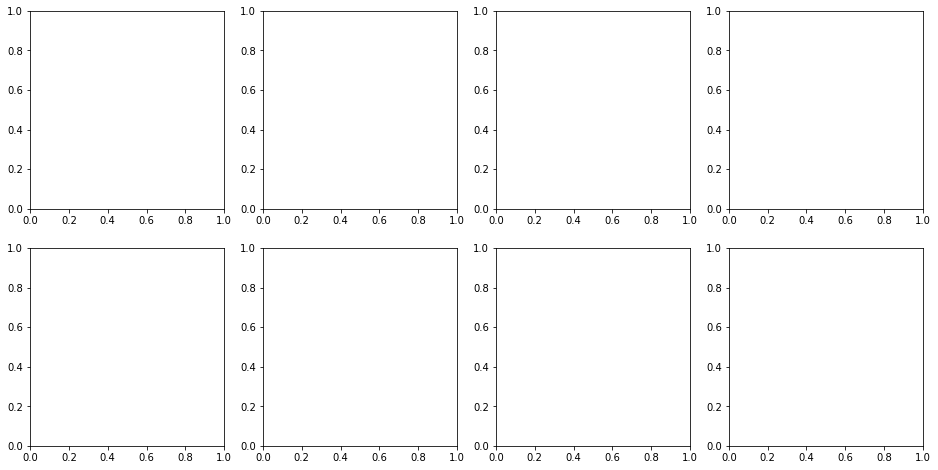

In [6]:
fig, axs = plt.subplots(figsize=(16,8), ncols=4, nrows=2)
features = list(set(hotel_df.columns) - set(['is_canceled','deposit_type']))

for i, feature in enumerate(features):
    row = int(i/4)
    col = i%4
    sns.boxplot(x="is_canceled", y=features, data=hotel_df, ax=axs[row][col])

#### (2) 결측치를 탐색하고 대체 방법 및 근거를 제시하시오.

#### (3) 데이터 질을 향상시킬 수 있는 방법을 제안하시오

In [ ]:
## 결측치 대체, 이상치 제거

#### (4) 데이터 불균형을 시각화하여 식별하고 불균형 판단근거를 작성하시오.

<BarContainer object of 2 artists>

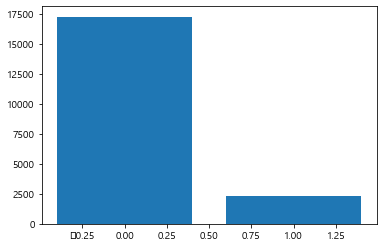

In [186]:
target_freq = hotel_df['is_canceled'].value_counts()
plt.bar(target_freq.index, target_freq.values)
# 1 : 0.88

#### (5) 오버 샘플링 기법을 설명하고 비교한 뒤 2개 기법을 선정하고 근거를 제시하시오.

#### (6) 기법을 선정한 이유를 작성하고, 원데이터를 포함해 3개의 데이터 세트를 구성하시오.

In [187]:
# 17:46
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

encoded_df = pd.get_dummies(hotel_df)
x = encoded_df.drop('is_canceled', axis=1)
y = encoded_df['is_canceled']

oversample = RandomOverSampler()
x_over, y_over = oversample.fit_resample(x, y)

smote_sample = SMOTE(sampling_strategy='minority')
x_sm, y_sm = smote_sample.fit_resample(x,y)

#### (7) 오버 샘플링 데이터와 원데이터를 사용해 정확도 측면 모델 하나와 속도 측면의 모델 하나를 선정하고, 그 이유를 설명하시오.

In [195]:
from sklearn.model_selection import train_test_split
import time

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify = y)

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


start = time.time()
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print('Decision tree 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))
print('time :', time.time()-start)

start = time.time()
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForest 정확도: {0:.4f}'.format(accuracy_score(y_test, rf_pred)))
print('time :', time.time()-start)

start = time.time()
lr_clf = LogisticRegression(solver='liblinear', random_state=42)
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print('Logistic 정확도: {0:.4f}'.format(accuracy_score(y_test, lr_pred)))
print('time :', time.time()-start)

Decision tree 정확도: 0.8722
time : 0.06780219078063965
RandomForest 정확도: 0.9189
time : 1.1776199340820312
Logistic 정확도: 0.9225
time : 0.04788613319396973


In [196]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_sm, y_sm, test_size=0.3, random_state=42, stratify = y_sm)

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


start = time.time()
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print('Decision tree 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

start = time.time()
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForest 정확도: {0:.4f}'.format(accuracy_score(y_test, rf_pred)))
print('time :', time.time()-start)

start = time.time()
lr_clf = LogisticRegression(solver='liblinear', random_state=42)
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print('Logistic 정확도: {0:.4f}'.format(accuracy_score(y_test, lr_pred)))
print('time :', time.time()-start)

Decision tree 정확도: 0.8703
RandomForest 정확도: 0.8917
time : 2.0790834426879883
Logistic 정확도: 0.7339
time : 0.08502578735351562


In [197]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_over, y_over, test_size=0.3, random_state=42, stratify = y_over)

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


start = time.time()
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print('Decision tree 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

start = time.time()
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForest 정확도: {0:.4f}'.format(accuracy_score(y_test, rf_pred)))
print('time :', time.time()-start)

start = time.time()
lr_clf = LogisticRegression(solver='liblinear', random_state=42)
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print('Logistic 정확도: {0:.4f}'.format(accuracy_score(y_test, lr_pred)))
print('time :', time.time()-start)

Decision tree 정확도: 0.9452
RandomForest 정확도: 0.9633
time : 2.039185047149658
Logistic 정확도: 0.7041
time : 0.0869143009185791


#### (8) 원데이터와 오버 샘플링 데이터를 가지고 각각 분류한 결과를 바탕으로 오버 샘플링이 성능에 미친 영향에 대해 작성하시오.

### 2. 통계분석 (50점)

#### 1. 공장에서는 시제품의 농도(%)가 60이라고 주장하며 품질관리팀에서 10개의 샘플을 뽑았다. 유의수준 5%에서 다음을 검정하시오.

In [207]:
x =[52 ,50 ,62 ,75 ,26 ,45 ,62 ,35 ,57 ,14 ]

from scipy.stats import shapiro
stats.wilcoxon(np.array(x) - 60) # H0: 시제품의 농도 = 60, H1: not H0 ===> 귀무가설 채택, 시제품의 농도 60

WilcoxonResult(statistic=9.5, pvalue=0.064453125)

In [206]:
np.array(x) - 60

array([ -8, -10,   2,  15, -34, -15,   2, -25,  -3, -46])

In [60]:
stats.ttest_1samp(x, 60) # H0: 시제품의 농도 = 60, H1: not H0 ===> 귀무가설기각, 즉 시제품의 농도 60이 아님

Ttest_1sampResult(statistic=-2.099292080780179, pvalue=0.06519313277276138)

#### (1) 연구가설, 귀무가설을 작성하시오.

In [76]:
x

[52, 50, 62, 75, 26, 45, 62, 35, 57, 14]

#### (2) 유효한 샘플의 수를 계산하시오.

In [235]:
e = 5 # 허용오차 5로 설정
z =stats.norm.ppf(0.05/2)
sigma = np.std(x)
# t = stats.t.ppf(q=0.05, df=9)
(z * sigma/e)**2

46.70599292552747

#### (3) 검정통계량을 구하고 연구가설 채택 여부를 작성하시오.

#### 2. 코로나 시계열 데이터로 다음을 수행하시오.

In [77]:
import pandas as pd
import urllib.request
from urllib.parse import quote
from io import StringIO

url2 = 'https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/서울특별시 코로나19.csv'
encoded_url2 = quote(url2, safe=':/')

response2 = urllib.request.urlopen(encoded_url2)
covid = pd.read_csv(StringIO(response2.read().decode('utf-8')))
covid

,날짜,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,강북구,...,강서구,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구
0,2022-03-30,37261,33753,55376,81018,96008,95433,103288,116862,75118,...,148359,109973,63687,110293,106238,132305,104368,136200,176765,121926
1,2022-03-29,36216,32835,53872,79030,93474,92993,100255,113609,72934,...,143573,106162,61840,106171,102955,127626,100529,132333,172292,118842
2,2022-03-28,35276,31878,52391,76802,91030,90277,97419,110583,70754,...,139633,103573,59946,104109,100665,124805,98869,128813,167386,115846
3,2022-03-27,34879,31577,51652,76108,89876,89302,96359,109500,70003,...,137908,102610,59393,102916,99426,123374,96873,126296,165373,113549
4,2022-03-26,34061,30903,50720,74178,87770,87345,93690,106437,68329,...,134285,99938,57925,100349,96989,120413,95124,123992,161650,110649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
780,2020-02-09,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
781,2020-02-08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
782,2020-02-07,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
783,2020-02-06,3,0,0,0,0,0,1,2,0,...,1,0,0,0,0,0,0,0,1,0


#### (1) ACF를 사용해서 distance를 계산하시오

In [275]:
covid_df = pd.DataFrame({'종로구': acf(covid['종로구'])})
cols = covid.columns[2:-1]
for i in cols:
    aa = pd.DataFrame({i: acf(covid[i])})
    covid_df = pd.concat([covid_df,aa], axis=1)

In [276]:
covid_df

,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,강북구,도봉구,...,양천구,강서구,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.965624,0.966025,0.965807,0.964843,0.965118,0.966179,0.964429,0.964386,0.964873,0.964677,...,0.963406,0.963102,0.964896,0.964495,0.964211,0.964682,0.964599,0.964920,0.965594,0.965216
2,0.932172,0.932933,0.932148,0.930035,0.930705,0.932781,0.929547,0.929349,0.930425,0.930168,...,0.927777,0.927079,0.930870,0.929726,0.929708,0.930160,0.930349,0.931073,0.931913,0.930854
3,0.899077,0.900435,0.899075,0.895739,0.896734,0.900063,0.895251,0.894822,0.896665,0.895849,...,0.892371,0.891603,0.897198,0.895662,0.895164,0.895834,0.896316,0.897017,0.898790,0.897147
4,0.865542,0.867391,0.865682,0.860691,0.862274,0.866781,0.860302,0.859554,0.862291,0.861332,...,0.856622,0.855502,0.862796,0.860914,0.860051,0.860964,0.861660,0.863028,0.865697,0.862857
5,0.832363,0.834610,0.832234,0.826010,0.828063,0.833667,0.825880,0.824838,0.828221,0.826712,...,0.821127,0.819774,0.828844,0.826576,0.825267,0.826407,0.827261,0.828942,0.832537,0.828721
6,0.794512,0.796898,0.798381,0.789577,0.793461,0.800704,0.791533,0.791266,0.792955,0.792456,...,0.786391,0.785463,0.795141,0.789627,0.790578,0.792251,0.794470,0.794835,0.801510,0.796314
7,0.761958,0.764614,0.765454,0.755252,0.759914,0.768159,0.757813,0.757314,0.759475,0.758619,...,0.751933,0.750681,0.762101,0.756024,0.756505,0.758462,0.761023,0.761611,0.769774,0.762922
8,0.729971,0.733020,0.733336,0.721447,0.727410,0.736171,0.724873,0.724416,0.726817,0.725532,...,0.718543,0.716584,0.729844,0.723216,0.723347,0.725385,0.728057,0.729550,0.738757,0.730138
9,0.699409,0.702617,0.702647,0.689063,0.696133,0.705310,0.693150,0.693167,0.695380,0.693844,...,0.686493,0.683842,0.699238,0.691591,0.692374,0.693934,0.696761,0.698786,0.709541,0.698760


In [92]:
from statsmodels.tsa.stattools import adfuller

adf = adfuller(covid['동대문구'], regression='ct')
print('ADF statistic:{}'.format(adf[0]))
print('p-value:{}'.format(adf[1])) # H0 : 정상성가지지 않음 ==> 채택

ADF statistic:-1.8221626785015828
p-value:0.6939748250203062


#### (2) 계층적 군집 분석을 위해 덴드로그램을 작성하시오.

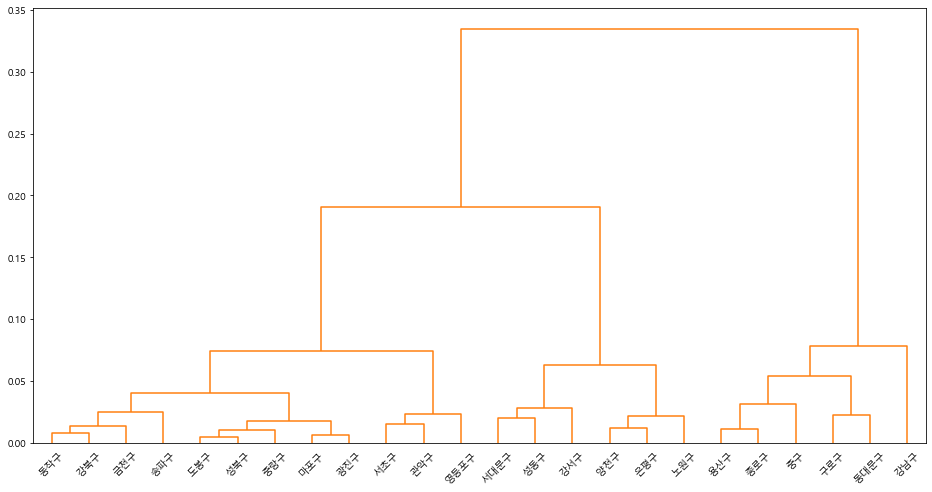

In [279]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt
from matplotlib import font_manager

covid_df_cluster = covid_df.T

# 한글 폰트 경로 설정
font_path = 'C:/Windows/Fonts/malgun.ttf'  # 사용할 한글 폰트의 경로로 변경해야 합니다.
font_name = font_manager.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)

labelList = covid_df_cluster.index
ward = linkage(covid_df_cluster, metric='euclidean', method='ward')

plt.figure(figsize=(16,8))
dendrogram(ward, orientation='top', labels=labelList, distance_sort='descending', color_threshold=250, show_leaf_counts=True)

plt.axhline(y=250, color='r', linewidth=1)
plt.show()

#### 3. 사회과학, 자연과학, 공학 세 개 학과의 평점조사표를 보고 학과와 성적이 관계있는지 검정하시오.

In [169]:
사회 = [16, 30, 12]
자연 = [12, 20, 3]
공학 = [18, 13, 14]
table = pd.DataFrame({'사회과학': 사회,
                     '자연과학': 자연,
                     '공학': 공학},
                     index=['3.5~4.5', '2.5~3.5', '1.5~2.5'])
print (table)

         사회과학  자연과학  공학
3.5~4.5    16    12  18
2.5~3.5    30    20  13
1.5~2.5    12     3  14


#### (1) 연구가설, 귀무가설을 작성하시오.

In [ ]:
H0 : 학과와 성적이 독립
H1 : 학과와 성적은 연관이 있음

#### (2) 학과와 성적이 독립일 때 기댓값을 구하시오.

In [214]:
from scipy import stats
chi2 = stats.chi2_contingency(observed=table)
print('검정통계량 : ', chi2[0])
print('p-value : ', chi2[1])
print('기대값 : ', chi2[3])

검정통계량 :  10.199441509990177
p-value :  0.03719883770303157
기대값 :  [[19.33333333 11.66666667 15.        ]
 [26.47826087 15.97826087 20.54347826]
 [12.1884058   7.35507246  9.45652174]]


#### (3) 검정통계량을 구하고 연구가설 채택 여부를 작성하시오.